In [ ]:
13. DECISION TREE

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score

df = pd.read_excel('heart_disease.xlsx', sheet_name='Heart_disease')
print(df.head())

#Display basic info
print("Shape of dataset:", df.shape)
print("\nDataset Info:")
print(df.info())
display(df.head())

   age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0  
Shape of dataset: (908, 13)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    -----

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


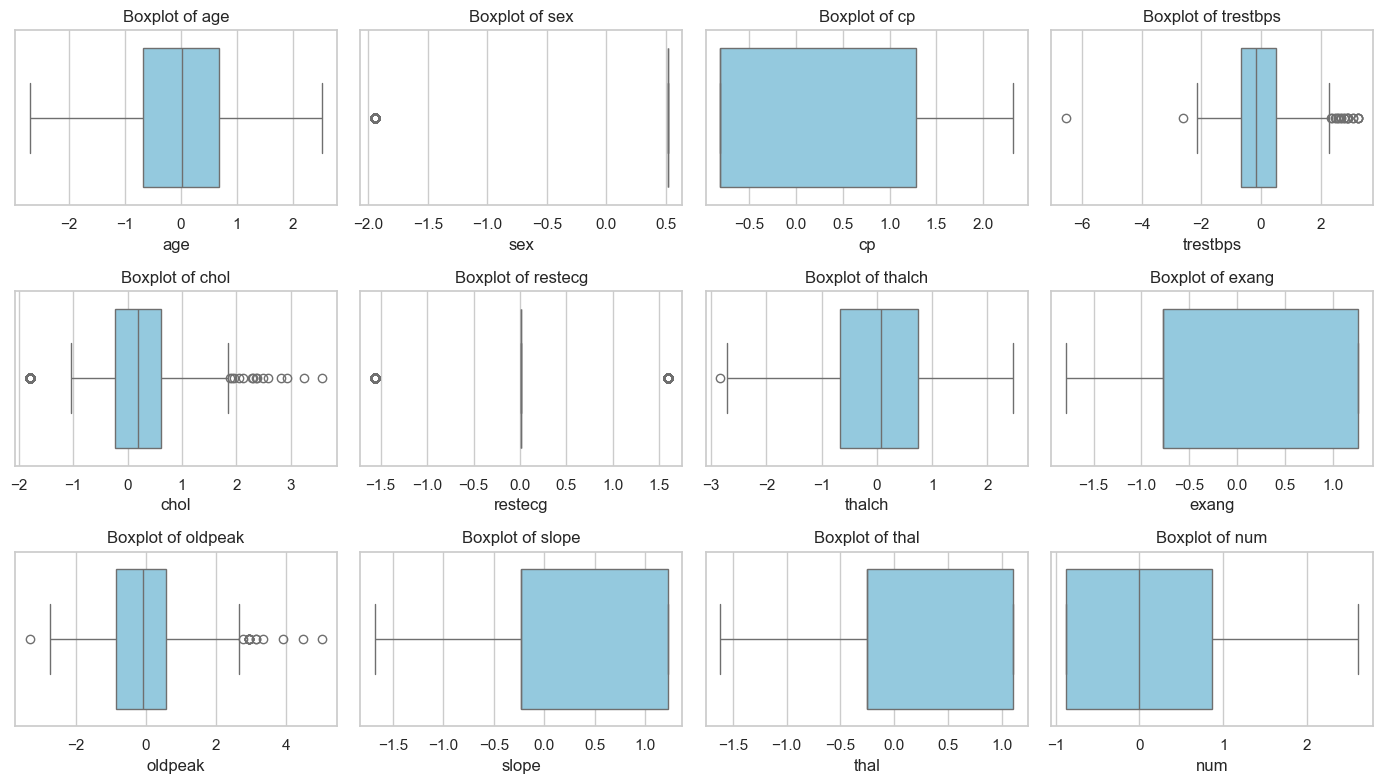


Rows with invalid 'trestbps' = 0: 0
Rows with invalid 'chol' = 0: 0


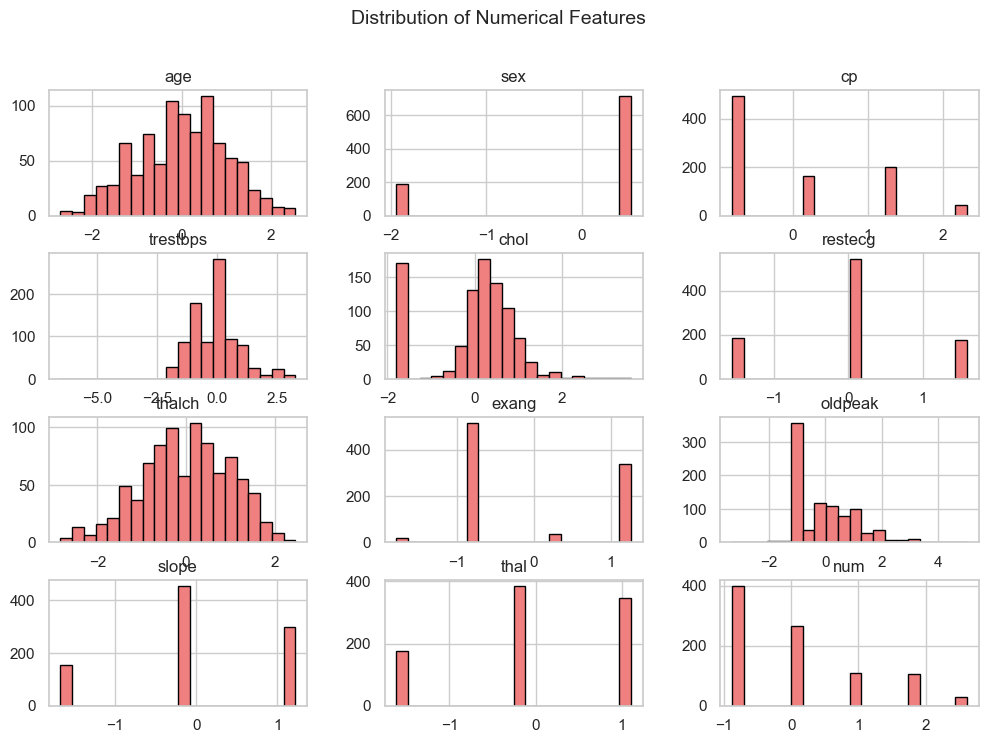

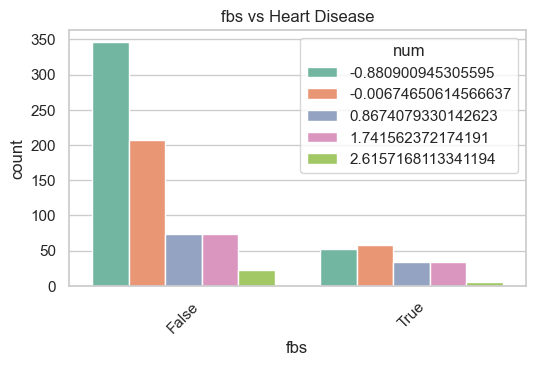

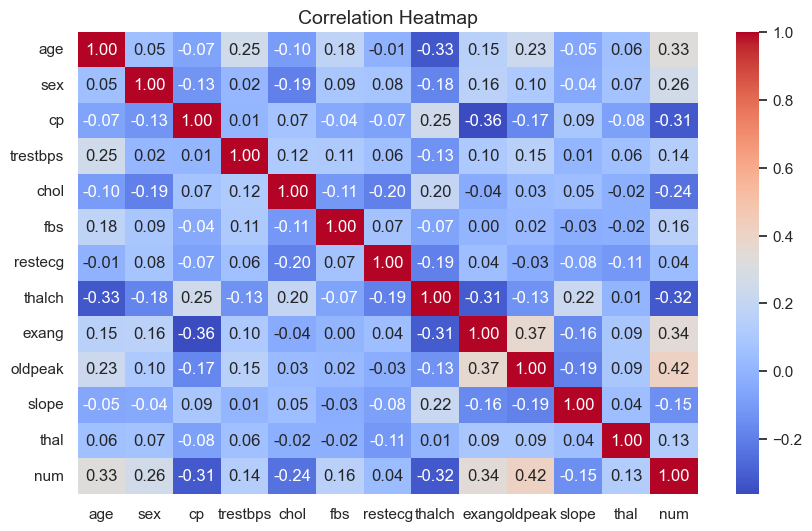

 EDA Completed!

Insights Summary:
- Only 'oldpeak' has missing values.
- 'trestbps' and 'chol' have some invalid (zero) values — need cleaning.
- Outliers are visible in 'chol', 'oldpeak', and 'thalch'.
- Target variable 'num' shows imbalance (majority around 0–1).


In [33]:
# 2. EXPLORATORY DATA ANALYSIS (EDA)
#================================================================
# -------------------------------
#  Detect Outliers and Inconsistencies
# -------------------------------
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Boxplots for numeric columns to visualize outliers
plt.figure(figsize=(14, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

# Detect potential invalid data (e.g., 0 blood pressure or cholesterol)
invalid_bp = df[df['trestbps'] == 0]
invalid_chol = df[df['chol'] == 0]
print(f"\nRows with invalid 'trestbps' = 0: {len(invalid_bp)}")
print(f"Rows with invalid 'chol' = 0: {len(invalid_chol)}")

# -------------------------------
#  Distribution of Features
# -------------------------------
# Histograms for numerical variables
df[num_cols].hist(bins=20, figsize=(12, 8), color='lightcoral', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()

# Count plots for categorical variables
cat_cols = df.select_dtypes(include=['object', 'bool']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=df[col], hue=df['num'], palette='Set2')
    plt.title(f"{col} vs Heart Disease")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -------------------------------
#  Correlation Matrix
# -------------------------------
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

# -------------------------------
#  Summary Insights
# -------------------------------
print(" EDA Completed!")
print("\nInsights Summary:")
print("- Only 'oldpeak' has missing values.")
print("- 'trestbps' and 'chol' have some invalid (zero) values — need cleaning.")
print("- Outliers are visible in 'chol', 'oldpeak', and 'thalch'.")
print("- Target variable 'num' shows imbalance (majority around 0–1).")




In [36]:
'''3. Feature Engineering:
If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical 
features, or handling missing values.
========================================================================='''
from sklearn.preprocessing import LabelEncoder, StandardScaler
# --- Handle missing values ---
df['oldpeak'].fillna(df['oldpeak'].median())

# Replace invalid values (like 0 in 'trestbps' or 'chol')
df['trestbps'] = df['trestbps'].replace(0, df['trestbps'].median())
df['chol'] = df['chol'].replace(0, df['chol'].median())

# --- Encode categorical features ---
label = LabelEncoder()
cat_cols = df.select_dtypes(include=['object', 'bool']).columns
for col in cat_cols:
    df[col] = label.fit_transform(df[col])

# --- Scale numerical features ---
scaler = StandardScaler()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# Final check
print(df.head())
print("\nFeature Engineering Completed Successfully!")

        age       sex        cp  trestbps      chol       fbs   restecg  \
0  1.006097  0.514775  2.322491  0.568184  0.281318  1.975526 -1.560916   
1 -1.396447  0.514775  0.233746  0.077848  0.013691 -0.506194  0.015644   
2  0.350858  0.514775 -0.810626  0.323016 -0.084439 -0.506194  0.015644   
3 -0.195175  0.514775  2.322491 -0.755723 -0.137964 -0.506194 -1.560916   
4  0.350858  0.514775 -0.810626 -1.147992 -0.004151 -0.506194  0.015644   

     thalch     exang   oldpeak     slope      thal       num  
0  0.523285 -0.773147  1.333786 -1.676279 -1.615301 -0.880901  
1 -0.148399 -0.773147 -0.845460 -0.226913 -1.615301 -0.880901  
2  0.448654 -0.773147 -0.466461 -0.226913 -1.615301 -0.880901  
3  2.015918 -0.773147 -0.845460 -0.226913 -1.615301 -0.880901  
4 -0.372294  1.262395  0.575787 -0.226913 -1.615301 -0.880901  

Feature Engineering Completed Successfully!


In [40]:
'''4. Decision Tree Classification:
Split the dataset into training and testing sets (e.g., using an 80-20 split).
Implement a Decision Tree Classification model using a library like scikit-learn.
Train the model on the training set and evaluate its performance on the testing set using appropriate 
evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).'''
#========================================================================================================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Handle missing values
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].median())

# Convert target to categorical: 0 = no disease, 1 = disease
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Encode categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include=['object', 'bool']).columns:
    df[col] = le.fit_transform(df[col])

# Split data
X = df.drop('num', axis=1)
y = df['num']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7362637362637363

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       136
           1       0.48      0.48      0.48        46

    accuracy                           0.74       182
   macro avg       0.65      0.65      0.65       182
weighted avg       0.74      0.74      0.74       182



In [41]:
'''5. Hyperparameter Tuning:
Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters 
such as maximum depth, minimum samples split, and criterion.'''
#==========================================================================================================

from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Grid search
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}
Best Score: 0.7751724137931035


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       136
           1       0.50      0.35      0.41        46

    accuracy                           0.75       182
   macro avg       0.65      0.62      0.62       182
weighted avg       0.72      0.75      0.73       182



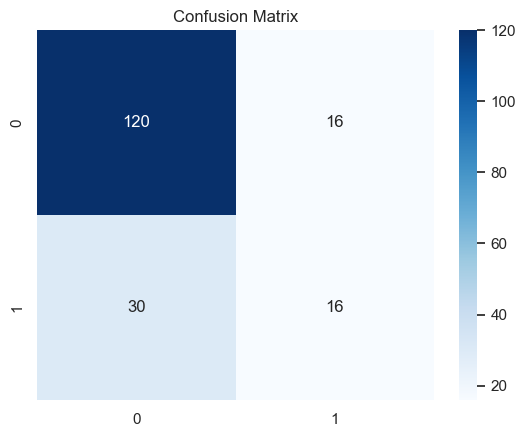

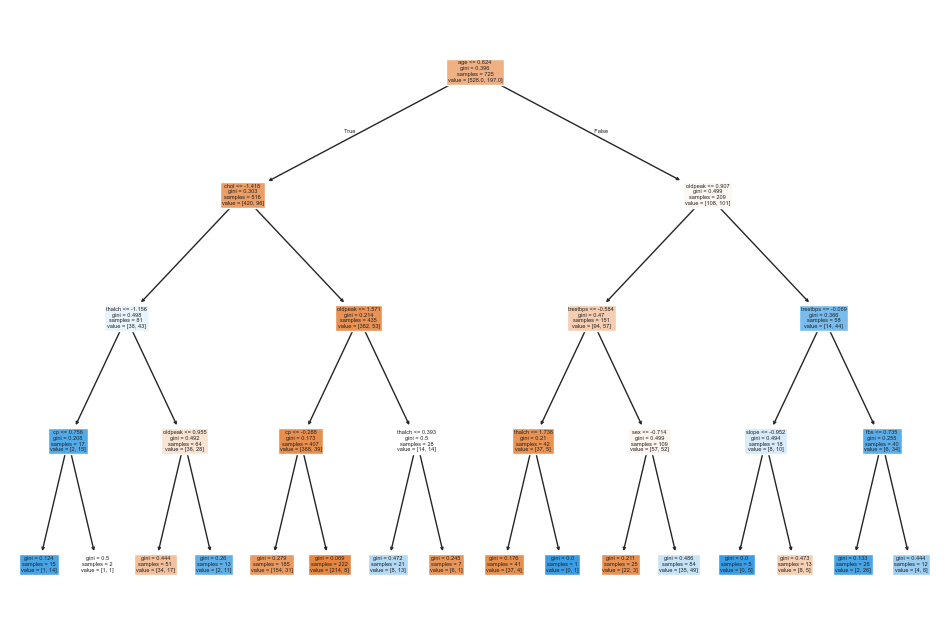

In [42]:
'''6. Model Evaluation and Analysis:
Analyse the performance of the Decision Tree model using the evaluation metrics obtained.
Visualize the decision tree structure to understand the rules learned by the model and identify important features'''
#==========================================================================================================
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import tree
# Evaluate model
y_pred = grid.best_estimator_.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Visualize Decision Tree
plt.figure(figsize=(12, 8))
tree.plot_tree(grid.best_estimator_, feature_names=X.columns, filled=True)
plt.show()


In [20]:
Interview Questions:
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
Ans:  Decision Tree models have several hyperparameters that control their complexity and performance. One of the
most important is max_depth, which sets how deep the tree can grow. A smaller depth prevents overfitting by keeping
the model simple, while a larger depth allows the tree to capture more detail but risks fitting noise in the data. 
Similarly, min_samples_split defines the minimum number of samples needed to split a node; increasing this value
makes the model simpler, while decreasing it allows more splits and can lead to overfitting. The min_samples_leaf 
parameter ensures that each leaf has a minimum number of samples, which helps smooth predictions and improves
generalization. The criterion parameter determines how the quality of a split is measured—options like “gini” or
“entropy” (for classification) and “squared_error” or “absolute_error” (for regression) influence how the tree
decides where to split. Additionally, max_features limits the number of features considered for each split, 
balancing between model accuracy and speed, while max_leaf_nodes controls the maximum number of leaf nodes to 
restrict model complexity. Finally, splitter defines the strategy for choosing splits (“best” or “random”), and 
random_state ensures reproducibility of results. Tuning these hyperparameters properly helps achieve a good balance 
between bias and variance, leading to a more accurate and robust model.

2. What is the difference between the Label encoding and One-hot encoding?
Ans:  Label Encoding converts each category into a unique numerical value (e.g., Red = 0, Blue = 1, Green = 2).
It’s simple but may create a false sense of order among categories.
One-Hot Encoding, on the other hand, creates separate binary columns for each category (e.g., Red = [1,0,0], 
Blue = [0,1,0], Green = [0,0,1]). It avoids the problem of order but increases the number of features.

SyntaxError: unterminated string literal (detected at line 2) (3031655539.py, line 2)